In [2]:
import sys
sys.path.append('../')
import minitorch
from minitorch.viz import draw_dot

import torch
import numpy as np
from IPython.display import display, SVG


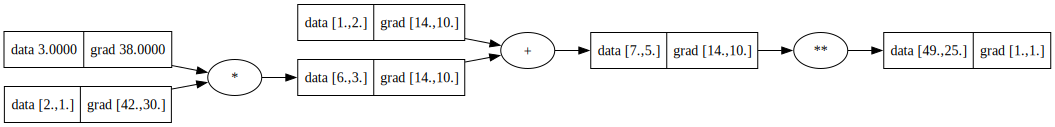

In [2]:
a=minitorch.Tensor([2.0,1.0])
b=minitorch.Tensor([3.0])
c=b*a
d=minitorch.Tensor([1.0,2.0])
e=d+c
f=e**2
f.backward()


# Visualize
dot = draw_dot(f, format='svg')
display(SVG(dot.pipe(format='svg')))

a.data == t_a.data: True
b.data == t_b.data: True
c.data == t_c.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


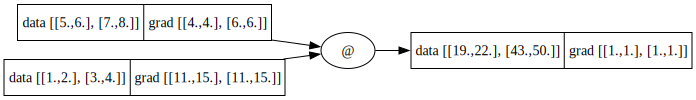

In [3]:
a=minitorch.Tensor([[1.0,2.0],[3.0,4.0]])
b=minitorch.Tensor([[5.0,6.0],[7.0,8.0]])
c = a @ b
# print(c)

t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
# print(t_c)

print("a.data == t_a.data:", np.allclose(a.data, t_a.data))
print("b.data == t_b.data:", np.allclose(b.data, t_b.data))
print("c.data == t_c.data:", np.allclose(c.data, t_c.data))


c.backward()
# t_c.backward()
t_c.backward(torch.ones_like(t_c))

print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

# Visualize
dot = draw_dot(c, format='svg')
display(SVG(dot.pipe(format='svg')))


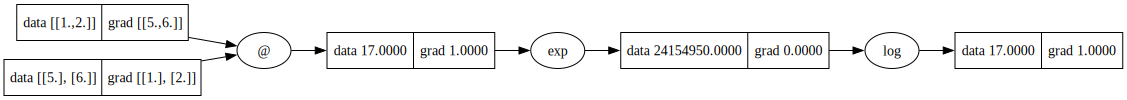

In [4]:
a=minitorch.Tensor([[1.0,2.0]])
b=minitorch.Tensor([[5.0],[6.0]])
c=a@b
d=minitorch.exp(c)
e=minitorch.log(d)
e.backward()

# Visualize
dot = draw_dot(e, format='svg')
display(SVG(dot.pipe(format='svg')))

d.data == t_d.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


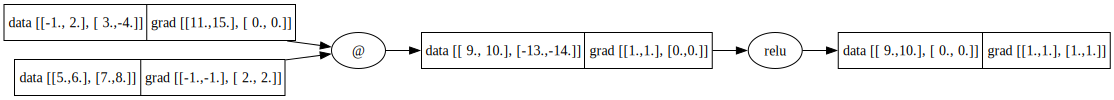

In [5]:
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d = minitorch.relu(c)
d.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_d = torch.relu(t_c)
t_d.backward(torch.ones_like(t_d))

print("d.data == t_d.data:", np.allclose(d.data, t_d.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

# Visualize
dot = draw_dot(d, format='svg')
display(SVG(dot.pipe(format='svg')))

d_sigmoid.data == t_d_sigmoid.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


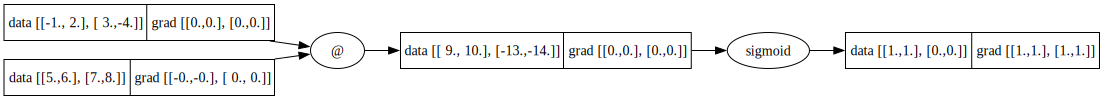

In [6]:
# Sigmoid
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d_sigmoid = minitorch.sigmoid(c)
d_sigmoid.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_d_sigmoid = torch.sigmoid(t_c)
t_d_sigmoid.backward(torch.ones_like(t_d_sigmoid))

print("d_sigmoid.data == t_d_sigmoid.data:", np.allclose(d_sigmoid.data, t_d_sigmoid.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

dot = draw_dot(d_sigmoid, format='svg')
display(SVG(dot.pipe(format='svg')))

d_leaky.data == t_d_leaky.data: True
a.grad == t_a.grad: True
b.grad == t_b.grad: True


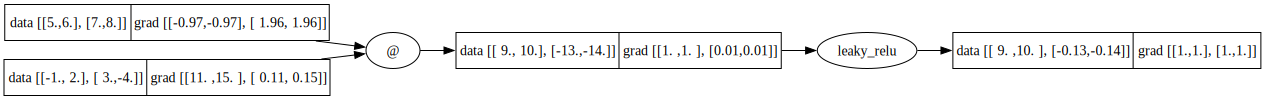

In [7]:
# Leaky ReLU
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d_leaky = minitorch.leaky_relu(c)
d_leaky.backward()

# PyTorch comparison
t_a = torch.tensor(a.data, requires_grad=True)
t_b = torch.tensor(b.data, requires_grad=True)
t_c = t_a @ t_b
t_d_leaky = torch.nn.functional.leaky_relu(t_c)
t_d_leaky.backward(torch.ones_like(t_d_leaky))

print("d_leaky.data == t_d_leaky.data:", np.allclose(d_leaky.data, t_d_leaky.data))
print("a.grad == t_a.grad:", np.allclose(a.grad, t_a.grad))
print("b.grad == t_b.grad:", np.allclose(b.grad, t_b.grad))

dot = draw_dot(d_leaky, format='svg')
display(SVG(dot.pipe(format='svg')))

Softmax output match: True
a.grad match: True
b.grad match: True
c.grad match: True


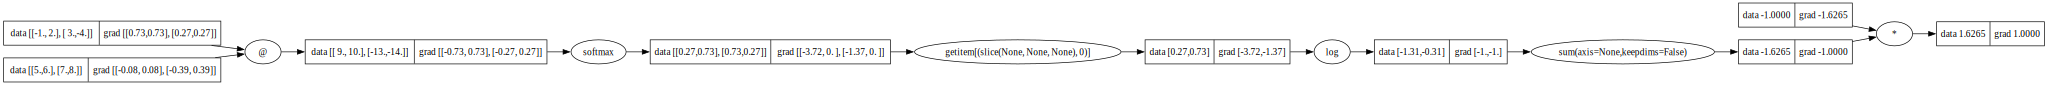

In [8]:
# Assuming minitorch behaves like PyTorch
import numpy as np
import torch
from IPython.display import SVG
from graphviz import Source  # Assuming draw_dot returns a graphviz object

# === Minitorch test ===
a = minitorch.Tensor([[-1.0, 2.0], [3.0, -4.0]])
b = minitorch.Tensor([[5.0, 6.0], [7.0, 8.0]])
c = a @ b
d_softmax = minitorch.softmax(c, dim=1)  # Make sure your softmax accepts dim
# Scalar loss: sum of negative log-probabilities of class 0
loss = -minitorch.log(d_softmax[:, 0]).sum()
loss.backward()

# === PyTorch test ===
t_a = torch.tensor([[-1.0, 2.0], [3.0, -4.0]], requires_grad=True)
t_b = torch.tensor([[5.0, 6.0], [7.0, 8.0]], requires_grad=True)
t_c = t_a @ t_b
t_c.retain_grad()
t_d_softmax = torch.softmax(t_c, dim=1)
t_loss = -torch.log(t_d_softmax[:, 0]).sum()
t_loss.backward()

# === Comparison ===
print("Softmax output match:", np.allclose(d_softmax.data, t_d_softmax.detach().numpy()))
print("a.grad match:", np.allclose(a.grad, t_a.grad.detach().numpy()))
print("b.grad match:", np.allclose(b.grad, t_b.grad.detach().numpy()))
print("c.grad match:", np.allclose(c.grad, t_c.grad.detach().numpy()))

# === Visualize autograd graph if supported ===
# `draw_dot` must accept a minitorch Tensor and produce a graphviz dot object
dot = draw_dot(loss, format='svg')
display(SVG(dot.pipe(format='svg')))


(2,)
(1, 2)
(1, 2, 1)


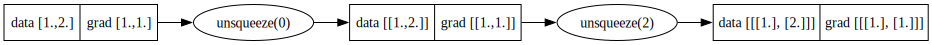

In [8]:
a = minitorch.Tensor([1.0, 2.0])
b = a.unsqueeze(0)
c = b.unsqueeze(2)

c.backward()

print(a.shape)
print(b.shape)
print(c.shape)

# Visualize the autograd graph for unsqueeze operation
dot = draw_dot(c, format='svg')
display(SVG(dot.pipe(format='svg')))